In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Importing libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import matplotlib.pyplot as plt

# Reading and viewing the dataframe

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [5]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [6]:
train_df = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
train_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


In [7]:
(train_df == 0).all(axis=1).sum()

0

# Data Pre-processing
Three techniques have been listed below-
1. Min- max Scaling
2. Z- score based Standard Scaling
3. Robust Scaling

For my usecase I have used robust scaling

## Min-max scaling

In [8]:
# # Extract numerical columns
# numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Normalize the numerical columns between 0 and 1
# train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
# train_df

## Standard scaling (z-score)

In [9]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
# train_df

## Robust Scaling

In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
train_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.174977,-0.216614,-0.285401,-0.286334,-0.269504,-0.346939,-0.382979,-0.274626,0.657143,1.181818,...,-0.288,1.088297,0.103538,-1.0,-1.182900,-0.563282,-0.991725,-0.761875,1.218433,-0.443849
1,0.028105,0.021030,-0.391578,-0.392847,0.469858,-0.102041,0.659574,0.451402,-0.571429,-1.454545,...,-0.408,-1.156540,0.103538,0.0,0.472097,-0.852805,0.652769,0.786436,-1.447926,0.638167
2,-0.669084,-0.635121,0.475812,0.477396,19.893617,13.877551,8.446809,22.245880,-1.742857,1.272727,...,7.856,-1.197546,-1.678074,-1.0,2.112652,2.394298,1.411999,-0.151602,0.444240,0.706379
3,0.003626,-0.007361,1.142884,1.146618,0.074468,-0.183673,0.127660,-0.258662,0.685714,0.636364,...,-0.408,-0.782400,-0.096578,0.0,0.108954,-0.852805,0.173775,0.692682,0.943779,-0.094345
4,0.691750,0.803365,-0.455822,-0.457286,0.625887,0.959184,0.936170,0.515964,-0.228571,-1.454545,...,0.776,-1.274768,0.063225,0.0,0.625650,0.623319,0.888924,1.003241,-0.948387,0.706111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,-0.025385,-0.041009,-0.733652,-0.736043,-0.267730,-0.428571,-0.404255,-0.276019,0.914286,1.181818,...,-0.408,1.088297,-0.476508,-1.0,-1.152397,-0.852805,-1.145926,-0.316669,1.354839,-0.244975
19215,-0.048957,-0.064143,0.637427,0.639505,0.111702,-0.163265,0.063830,0.153054,0.400000,0.545455,...,-0.240,0.290033,-0.123840,0.0,0.156788,-0.242698,0.147677,0.761875,0.402765,0.086974
19216,-0.699003,-0.804416,0.105162,0.105542,1.085106,1.816327,1.595745,0.909582,-1.400000,-3.000000,...,0.832,-1.347501,-0.025812,0.0,0.767418,0.661335,0.870465,0.823837,-2.633180,0.705977
19217,-0.696283,-0.818086,0.184152,0.184753,-0.074468,-0.244898,0.063830,-0.059006,-0.057143,0.454545,...,-0.216,0.397486,0.103538,0.0,-0.147314,-0.242698,0.147677,1.059594,0.243318,-0.163495


# Logistic Regression to predict 1 feature at a time

## Predicting Pastry

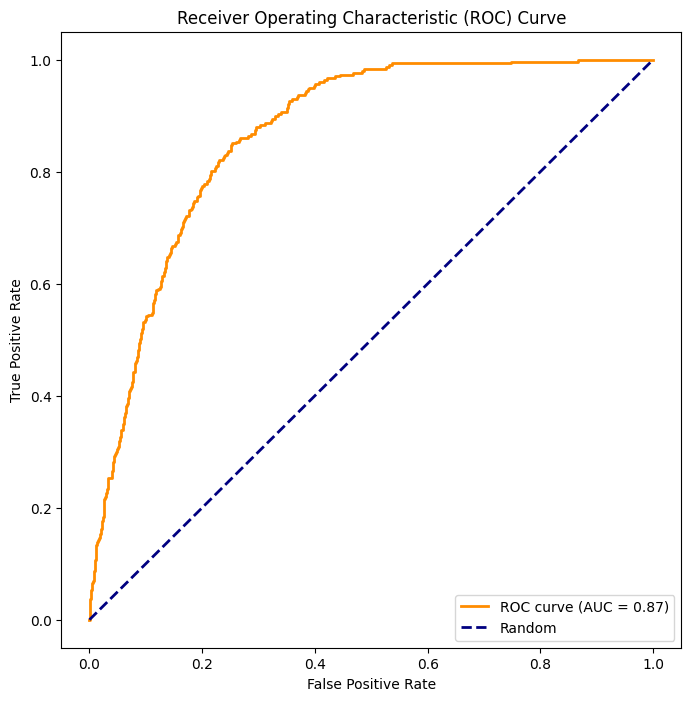

AUC Score: 0.8660941091085037


In [11]:
dependent_var = 'Pastry'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# Initialize the linear regression model
pastry_model = LogisticRegression()

# Fit the model on the training data
pastry_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = pastry_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the AUC score
auc_score_pastry = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score_pastry}')

## Predicting Z_Scratch
Random Forest (below in Approach 2) performs better

In [12]:
# dependent_var = 'Z_Scratch'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# # Initialize the linear regression model
# Z_Scratch_model = LogisticRegression()

# # Fit the model on the training data
# Z_Scratch_model.fit(X_train, y_train)

# # Predict probabilities for the positive class
# y_prob = Z_Scratch_model.predict_proba(X_test)[:, 1]

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate the Area Under the Curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Calculate and print the AUC score
# auc_score_z_scratch = roc_auc_score(y_test, y_prob)
# print(f'AUC Score: {auc_score_z_scratch}')

## Predicting K_Scatch
Random Forest (below in Approach 2) performs better

In [13]:
# dependent_var = 'K_Scatch'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# # Initialize the linear regression model
# K_Scratch_model = LogisticRegression()

# # Fit the model on the training data
# K_Scratch_model.fit(X_train, y_train)

# # Predict probabilities for the positive class
# y_prob = K_Scratch_model.predict_proba(X_test)[:, 1]

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate the Area Under the Curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Calculate and print the AUC score
# auc_score_k_scratch = roc_auc_score(y_test, y_prob)
# print(f'AUC Score: {auc_score_k_scratch}')

## Predicting Stains
Random Forest (below in Approach 2) performs better

In [14]:
# dependent_var = 'Stains'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# # Initialize the linear regression model
# Stains_model = LogisticRegression()

# # Fit the model on the training data
# Stains_model.fit(X_train, y_train)

# # Predict probabilities for the positive class
# y_prob = Stains_model.predict_proba(X_test)[:, 1]

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate the Area Under the Curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Calculate and print the AUC score
# auc_score_Stains = roc_auc_score(y_test, y_prob)
# print(f'AUC Score: {auc_score_Stains}')

## Predicting Dirtiness
Random Forest (from Approach 2 below) performs better

In [15]:
# dependent_var = 'Dirtiness'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# # Initialize the linear regression model
# Dirtiness_model = LogisticRegression()

# # Fit the model on the training data
# Dirtiness_model.fit(X_train, y_train)

# # Predict probabilities for the positive class
# y_prob = Dirtiness_model.predict_proba(X_test)[:, 1]

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate the Area Under the Curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Calculate and print the AUC score
# auc_score_Dirtiness = roc_auc_score(y_test, y_prob)
# print(f'AUC Score: {auc_score_Dirtiness}')

## Predicting Bumps
Random Forest (below in Approach 2) performs better

In [16]:
# dependent_var = 'Bumps'

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# # Initialize the linear regression model
# Bumps_model = LogisticRegression()

# # Fit the model on the training data
# Bumps_model.fit(X_train, y_train)

# # Predict probabilities for the positive class
# y_prob = Bumps_model.predict_proba(X_test)[:, 1]

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate the Area Under the Curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Calculate and print the AUC score
# auc_score_Bumps = roc_auc_score(y_test, y_prob)
# print(f'AUC Score: {auc_score_Bumps}')

## Predicting Other_Faults

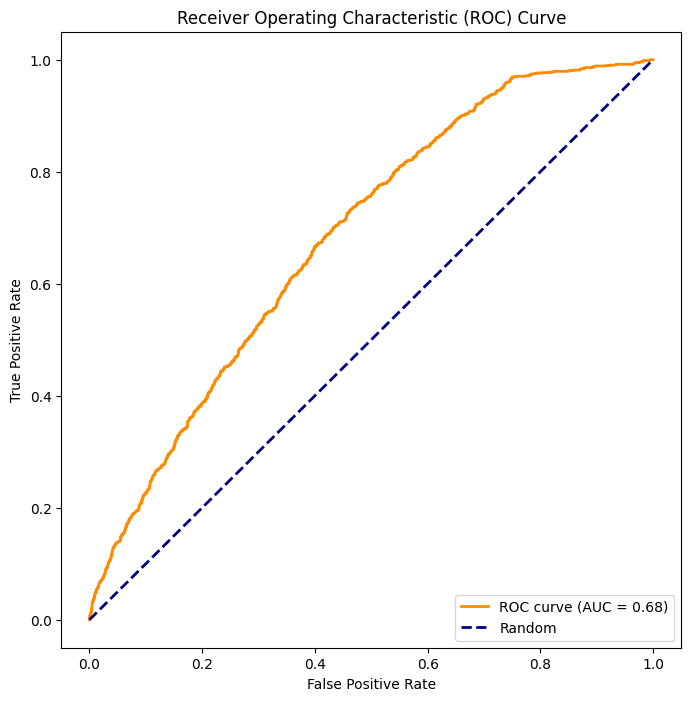

AUC Score: 0.6833111738673789


In [17]:
dependent_var = 'Other_Faults'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, df[dependent_var], test_size=0.2, random_state=42)

# Initialize the linear regression model
Other_Faults_model = LogisticRegression()

# Fit the model on the training data
Other_Faults_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = Other_Faults_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the AUC score
auc_score_Other_Faults = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score_Other_Faults}')

# Approach 2- Using Random Forest for prediction- 1 feature at a time

## Predicting Pastry
Logistic Regression works better for this feature

In [18]:
# target = df['Pastry']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# # Initialize the SVM model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model on the training data
# rf_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = rf_model.predict(X_test)

# # Calculate probabilities for the positive class
# y_prob = rf_model.predict_proba(X_test)[:, 1]

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate AUC score
# auc_score_pastry = roc_auc_score(y_test, y_prob)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_pastry:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# print(f'AUC Score: {auc_score_pastry:.4f}')


## Predicting Z_Scratch

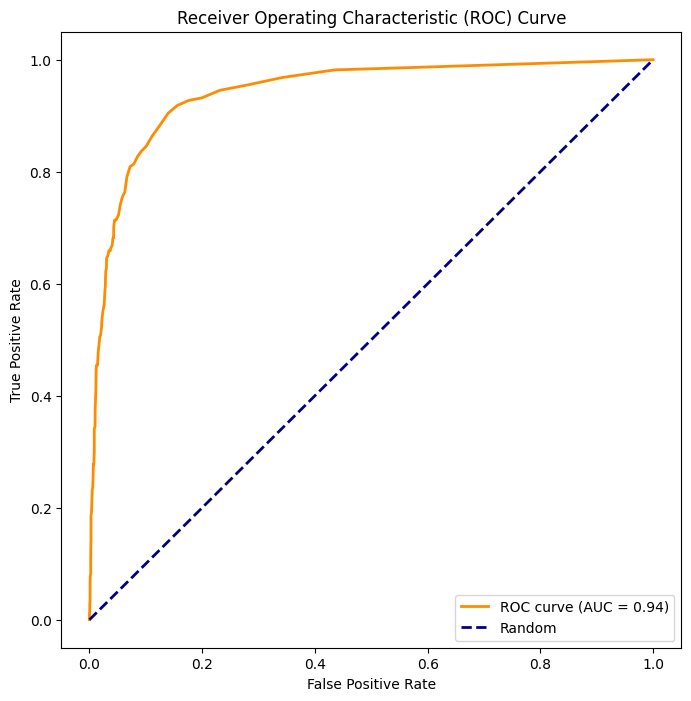

AUC Score: 0.9420


In [19]:
target = df['Z_Scratch']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# Initialize the SVM model
rf_model_z_scratch = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model_z_scratch.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model_z_scratch.predict(X_test)

# Calculate probabilities for the positive class
y_prob = rf_model_z_scratch.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score_z_scratch = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_z_scratch:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {auc_score_z_scratch:.4f}')

## Predicting K_Scatch

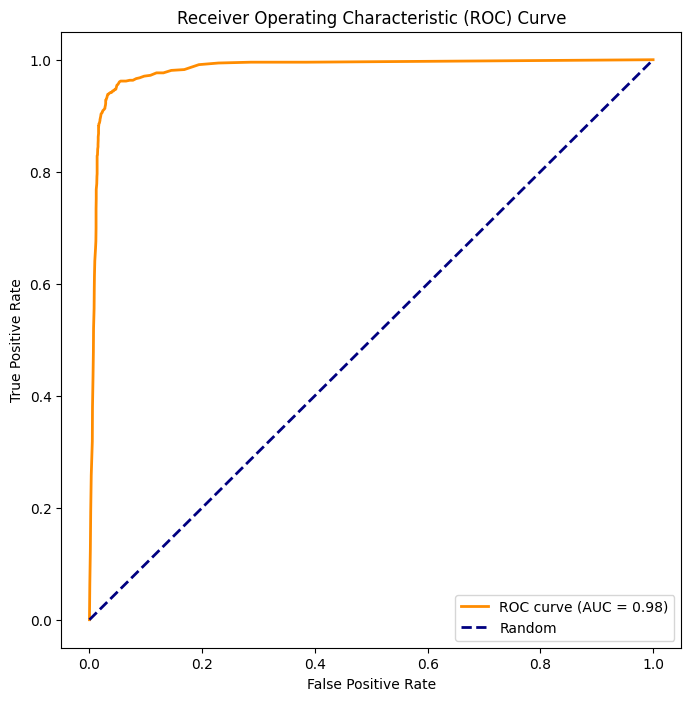

AUC Score: 0.9837


In [20]:
target = df['K_Scatch']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# Initialize the SVM model
rf_model_k_scratch = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model_k_scratch.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model_k_scratch.predict(X_test)

# Calculate probabilities for the positive class
y_prob = rf_model_k_scratch.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score_k_scratch = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_k_scratch:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {auc_score_k_scratch:.4f}')

## Predicting Stains

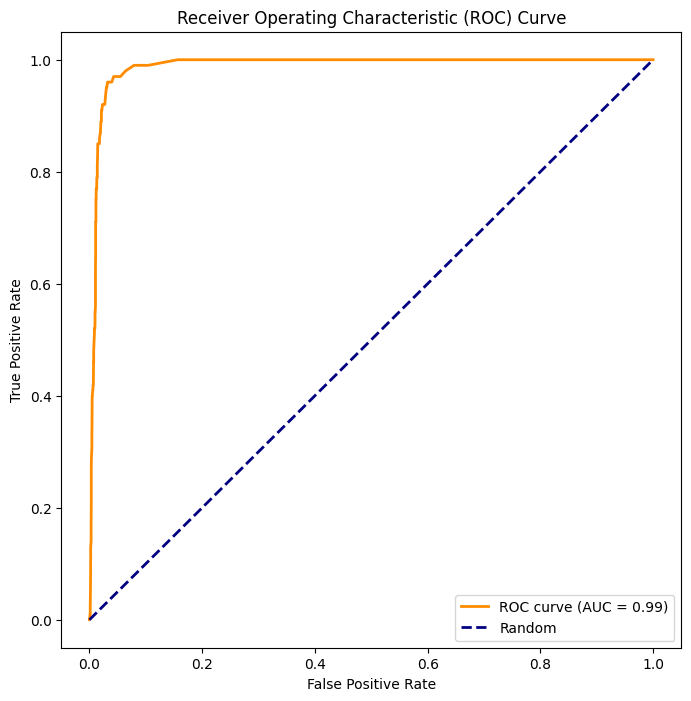

AUC Score: 0.9885


In [21]:
target = df['Stains']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# Initialize the SVM model
rf_model_Stains = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model_Stains.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model_Stains.predict(X_test)

# Calculate probabilities for the positive class
y_prob = rf_model_Stains.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score_Stains = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_Stains:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {auc_score_Stains:.4f}')

## Predicting Dirtiness

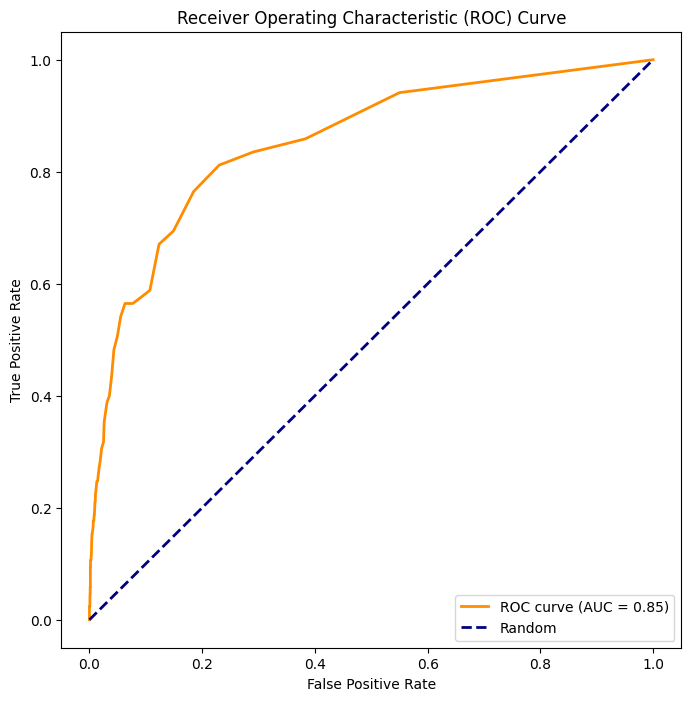

AUC Score: 0.8531


In [22]:
target = df['Dirtiness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# Initialize the SVM model
rf_model_Dirtiness = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model_Dirtiness.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model_Dirtiness.predict(X_test)

# Calculate probabilities for the positive class
y_prob = rf_model_Dirtiness.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score_Dirtiness = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_Dirtiness:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {auc_score_Dirtiness:.4f}')

## Predicting Bumps

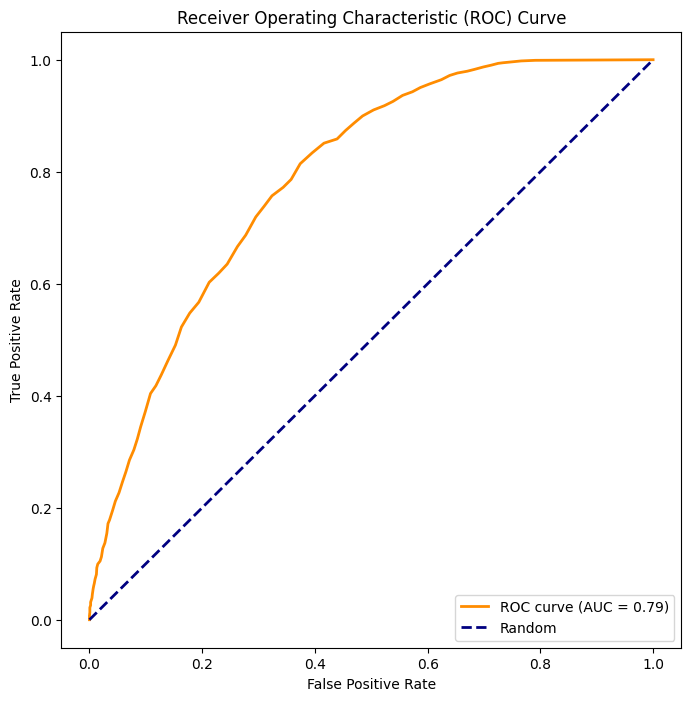

AUC Score: 0.7903


In [23]:
target = df['Bumps']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# Initialize the SVM model
rf_model_Bumps = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model_Bumps.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model_Bumps.predict(X_test)

# Calculate probabilities for the positive class
y_prob = rf_model_Bumps.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score_Bumps = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_Bumps:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {auc_score_Bumps:.4f}')

## Predicting Other_Faults
Approach 1 (from above) is better

In [24]:
# target = df['Other_Faults']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

# # Initialize the SVM model
# rf_model_Bumps = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model on the training data
# rf_model_Bumps.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = rf_model_Bumps.predict(X_test)

# # Calculate probabilities for the positive class
# y_prob = rf_model_Bumps.predict_proba(X_test)[:, 1]

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Calculate AUC score
# auc_score_Other_Faults = roc_auc_score(y_test, y_prob)

# # Plot the ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_Other_Faults:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# print(f'AUC Score: {auc_score_Other_Faults:.4f}')

In [25]:
(0.85 + 0.94 + 0.98 + 0.99 + 0.85 + 0.79 + 0.68)/7

0.8685714285714284

## Calculating average AUC Score

In [26]:
avg_auc_score = (auc_score_pastry + auc_score_z_scratch + auc_score_k_scratch + auc_score_Bumps + auc_score_Dirtiness + auc_score_Stains + auc_score_Other_Faults)/7
avg_auc_score

0.8724323844520087

# Generating submission response

In [27]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')
test_df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844


In [28]:
x_col = list(test_df.columns)
x_col = x_col[1:]
x_col

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [29]:
pastry_res = pastry_model.predict_proba(test_df[x_col])[:, 1]
test_df['Pastry'] = pastry_res
test_df['Pastry'] = test_df['Pastry'].round(2)

z_scratch_res = rf_model_z_scratch.predict_proba(test_df[x_col])[:, 1]
test_df['Z_Scratch'] = z_scratch_res
test_df['Z_Scratch'] = test_df['Z_Scratch'].round(2)

k_scatch_res = rf_model_k_scratch.predict_proba(test_df[x_col])[:, 1]
test_df['K_Scatch'] = k_scatch_res
test_df['K_Scatch'] = test_df['K_Scatch'].round(2)

stains_res = rf_model_Stains.predict_proba(test_df[x_col])[:, 1]
test_df['Stains'] = stains_res
test_df['Stains'] = test_df['Stains'].round(2)

bumps_res = rf_model_Bumps.predict_proba(test_df[x_col])[:, 1]
test_df['Bumps'] = bumps_res
test_df['Bumps'] = test_df['Bumps'].round(2)

dirtiness_res = rf_model_Dirtiness.predict_proba(test_df[x_col])[:, 1]
test_df['Dirtiness'] = dirtiness_res
test_df['Dirtiness'] = test_df['Dirtiness'].round(2)

other_faults_res = Other_Faults_model.predict_proba(test_df[x_col])[:, 1]
test_df['Other_Faults'] = other_faults_res
test_df['Other_Faults'] = test_df['Other_Faults'].round(2)

test_df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Bumps,Dirtiness,Other_Faults
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.6727,-0.2261,0.9172,0.0,0.13,0.36,0.02,0.43,0.30,0.0
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.9063,-0.1453,0.9104,0.0,0.13,0.40,0.01,0.44,0.37,0.0
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,-0.5238,-0.0435,0.6514,1.0,0.14,0.46,0.01,0.46,0.23,0.0
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.1818,-0.0738,0.2051,1.0,0.09,0.35,0.01,0.62,0.24,0.0
4,19223,559,592,544375,544389,140,19,15,15524,103,...,-0.5714,-0.0894,0.4170,0.0,0.13,0.39,0.02,0.63,0.23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.7661,-0.3109,0.8894,0.0,0.13,0.35,0.01,0.45,0.30,0.0
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.7222,-0.0448,0.1954,0.0,0.13,0.43,0.01,0.46,0.33,0.0
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,-0.0629,-0.0801,1.0000,0.0,0.17,0.41,0.01,0.40,0.28,0.0
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.8461,-0.2629,0.7844,0.0,0.14,0.40,0.01,0.44,0.33,0.0


In [30]:
submission_df = test_df[['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Bumps', 'Dirtiness', 'Other_Faults']]
submission_df

,id,Pastry,Z_Scratch,K_Scatch,Stains,Bumps,Dirtiness,Other_Faults
0,19219,0.0,0.13,0.36,0.02,0.43,0.30,0.0
1,19220,0.0,0.13,0.40,0.01,0.44,0.37,0.0
2,19221,1.0,0.14,0.46,0.01,0.46,0.23,0.0
3,19222,1.0,0.09,0.35,0.01,0.62,0.24,0.0
4,19223,0.0,0.13,0.39,0.02,0.63,0.23,0.0
...,...,...,...,...,...,...,...,...
12809,32028,0.0,0.13,0.35,0.01,0.45,0.30,0.0
12810,32029,0.0,0.13,0.43,0.01,0.46,0.33,0.0
12811,32030,0.0,0.17,0.41,0.01,0.40,0.28,0.0
12812,32031,0.0,0.14,0.40,0.01,0.44,0.33,0.0


In [31]:
submission_df.to_csv('/kaggle/working/submission.csv', index=False)